# DNN - UNSW

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.decomposition import PCA
from tensorflow.keras import regularizers
from tensorflow.keras import Model, layers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix


c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
def load_train_dataset():
    df_train = pd.read_csv('USNW_train-set.csv')

    limit1 = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit1]
    Y_train = df_train.iloc[:,limit1]
    
    return  X_train, Y_train,  df_train

X_train, Y_train,  df_train = load_train_dataset()

In [5]:
def load_test_dataset():
    df_test = pd.read_csv('USNW_test-set.csv')
    
    limit2 = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit2]
    Y_test = df_test.iloc[:,limit2]
    
    return X_test, Y_test,df_test

X_test, Y_test ,df_test = load_test_dataset()

In [6]:
X_train, X_val , Y_train , Y_val = train_test_split(X_train,Y_train, test_size=0.065,
                                                    stratify = Y_train,shuffle=True,random_state=42)

print('Training X   :',X_train.shape)
print('Validation X :',X_val.shape)
print('Test_X       :',X_test.shape)
print('Training_Y   :',Y_train.shape)
print('Validation Y :',Y_val.shape)
print('Test_Y       :',Y_test.shape)

Training X   : (87781, 39)
Validation X : (6103, 39)
Test_X       : (52347, 39)
Training_Y   : (87781,)
Validation Y : (6103,)
Test_Y       : (52347,)


In [7]:
METRICS = [ 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=1,
    patience=3,
    mode='max',
    min_delta = 0.0001,
    restore_best_weights=True)

In [9]:
def neural_network():
    #Neural Network Model
    model = Sequential()
    model.add(Dense(42, input_dim=39, activation='relu',kernel_initializer='glorot_uniform',
                    bias_initializer='zeros',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(42, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(42, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(42, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(42, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(42, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(42, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics = METRICS)
    
    return model


In [10]:
estimator = KerasClassifier(build_fn=neural_network)
estimator.fit(X_train,Y_train,verbose=1,callbacks=[early_stopping], epochs=200,validation_data=(X_val,Y_val), batch_size=64)

Train on 87781 samples, validate on 6103 samples
Epoch 1/200
87781/87781 [==============================] - 4s 42us/step - loss: 0.2366 - accuracy: 0.8848 - precision: 0.8272 - recall: 0.9729 - auc: 0.9464 - val_loss: 0.2119 - val_accuracy: 0.8983 - val_precision: 0.8427 - val_recall: 0.9796 - val_auc: 0.9624
Epoch 2/200
87781/87781 [==============================] - 3s 34us/step - loss: 0.2156 - accuracy: 0.9000 - precision: 0.8451 - recall: 0.9796 - auc: 0.9648 - val_loss: 0.2097 - val_accuracy: 0.9008 - val_precision: 0.8461 - val_recall: 0.9799 - val_auc: 0.9662
Epoch 3/200
87781/87781 [==============================] - 3s 34us/step - loss: 0.2119 - accuracy: 0.9015 - precision: 0.8470 - recall: 0.9798 - auc: 0.9671 - val_loss: 0.2055 - val_accuracy: 0.9020 - val_precision: 0.8481 - val_recall: 0.9796 - val_auc: 0.9678
Epoch 4/200
87781/87781 [==============================] - 3s 33us/step - loss: 0.2101 - accuracy: 0.9025 - precision: 0.8487 - recall: 0.9797 - auc: 0.9682 - val_lo

Epoch 32/200
87781/87781 [==============================] - 3s 31us/step - loss: 0.1950 - accuracy: 0.9069 - precision: 0.8655 - recall: 0.9636 - auc: 0.9734 - val_loss: 0.1977 - val_accuracy: 0.9069 - val_precision: 0.8656 - val_recall: 0.9634 - val_auc: 0.9735
Epoch 33/200
87781/87781 [==============================] - 3s 35us/step - loss: 0.1951 - accuracy: 0.9069 - precision: 0.8658 - recall: 0.9632 - auc: 0.9735 - val_loss: 0.1923 - val_accuracy: 0.9070 - val_precision: 0.8660 - val_recall: 0.9629 - val_auc: 0.9735
Epoch 34/200
87781/87781 [==============================] - 3s 33us/step - loss: 0.1948 - accuracy: 0.9070 - precision: 0.8662 - recall: 0.9627 - auc: 0.9736 - val_loss: 0.1910 - val_accuracy: 0.9070 - val_precision: 0.8663 - val_recall: 0.9625 - val_auc: 0.9736
Epoch 35/200
87781/87781 [==============================] - 3s 33us/step - loss: 0.1944 - accuracy: 0.9070 - precision: 0.8665 - recall: 0.9624 - auc: 0.9736 - val_loss: 0.1900 - val_accuracy: 0.9071 - val_preci

In [11]:
test_predictions = estimator.predict(X_test)
test_predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [12]:
print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(estimator, X_val, Y_val, cv=5).mean())*100))

Epoch 1/1
1221/1221 [==============================] - 0s 143us/step
Epoch 1/1
1221/1221 [==============================] - 0s 125us/step
Epoch 1/1
1221/1221 [==============================] - 0s 136us/step
Epoch 1/1
1220/1220 [==============================] - 0s 139us/step
Epoch 1/1
1220/1220 [==============================] - 0s 144us/step
Cross-Validation set accuracy: 90.775843 %


In [13]:
print("Train set accuracy           : {:.4f} %".format(estimator.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.4f} %".format(accuracy_score(Y_test, test_predictions)*100))
print("Test set precision           : {:.4f} %".format(precision_score(Y_test, test_predictions)*100))
print("Test set recall              : {:.4f} %".format(recall_score(Y_test, test_predictions)*100))

87781/87781 [==============================] - 3s 34us/step
Train set accuracy           : 90.7716 %
Test set accuracy            : 78.4247 %
Test set precision           : 63.0530 %
Test set recall              : 96.8387 %


In [14]:
def plot_cm(labels, predictions, p=0.81):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.text(0.3,2.6,'True Negatives  : '+ str(cm[0][0]),size=14)
    plt.text(0.3,2.8,'False Positives   : '+ str(cm[0][1]),size=14)
    plt.text(0.3,3,'False Negatives : '+ str(cm[1][0]),size=14)
    plt.text(0.3,3.2,'True Positives    : '+ str(cm[1][1]),size=14)

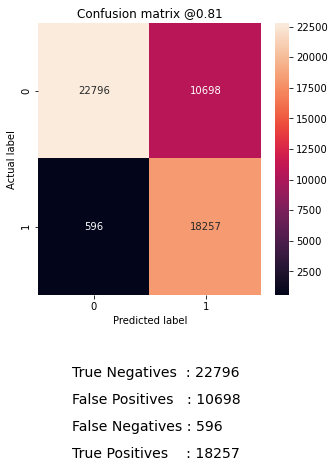

In [15]:
plot_cm(Y_test, test_predictions)

In [16]:
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80     33494
           1       0.63      0.97      0.76     18853

    accuracy                           0.78     52347
   macro avg       0.80      0.82      0.78     52347
weighted avg       0.85      0.78      0.79     52347



In [17]:
x = pd.DataFrame(X_train)

In [18]:
y = pd.DataFrame(Y_train)
y.reset_index(drop=True,inplace=True)

In [19]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
y['label'] = y['label'].map( {0:'normal', 1:'anomaly'} )
finalDf = pd.concat([principalDf, y], axis = 1)

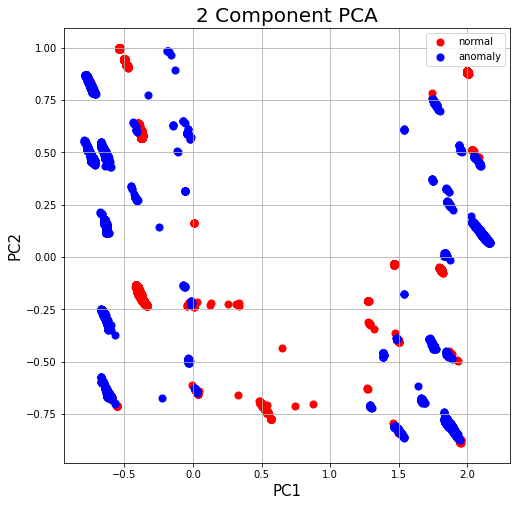

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['normal', 'anomaly']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
                  finalDf.loc[indicesToKeep, 'PC2'],  
                  c = color, 
                  s = 50)
ax.legend(targets)
ax.grid()